In [1]:
# Se importan las bibliotecas que van a ser usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Se leen todos los csv para poder trabajar con ellos
# Rutas para trabajar en el colab
dfEnero = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metricas de Rendimiento /Parcial1/DatosVentasEDA/Ventas_January_2019.csv')
dfFebrero = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metricas de Rendimiento /Parcial1/DatosVentasEDA/Ventas_February_2019.csv')
dfMarzo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metricas de Rendimiento /Parcial1/DatosVentasEDA/Ventas_March_2019.csv')
dfAbril = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metricas de Rendimiento /Parcial1/DatosVentasEDA/Ventas_April_2019.csv')
dfMayo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metricas de Rendimiento /Parcial1/DatosVentasEDA/Ventas_May_2019.csv')
dfJunio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metricas de Rendimiento /Parcial1/DatosVentasEDA/Ventas_June_2019.csv')
dfJulio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metricas de Rendimiento /Parcial1/DatosVentasEDA/Ventas_July_2019.csv')
dfAgosto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metricas de Rendimiento /Parcial1/DatosVentasEDA/Ventas_August_2019.csv')
dfSeptiembre = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metricas de Rendimiento /Parcial1/DatosVentasEDA/Ventas_September_2019.csv')
dfOctubre = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metricas de Rendimiento /Parcial1/DatosVentasEDA/Ventas_October_2019.csv')
dfNoviembre = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metricas de Rendimiento /Parcial1/DatosVentasEDA/Ventas_November_2019.csv')
dfDiciembre = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metricas de Rendimiento /Parcial1/DatosVentasEDA/Ventas_December_2019.csv')

In [4]:
# Rutas para trabajar en el computador
#dfEnero = pd.read_csv('Ventas_January_2019.csv')
#dfFebrero = pd.read_csv('Ventas_February_2019.csv')
#dfMarzo = pd.read_csv('Ventas_March_2019.csv')
#dfAbril = pd.read_csv('Ventas_April_2019.csv')
#dfMayo = pd.read_csv('Ventas_May_2019.csv')
#dfJunio = pd.read_csv('Ventas_June_2019.csv')
#dfJulio = pd.read_csv('Ventas_July_2019.csv')
#dfAgosto = pd.read_csv('Ventas_August_2019.csv')
#dfSeptiembre = pd.read_csv('Ventas_September_2019.csv')
#dfOctubre = pd.read_csv('Ventas_October_2019.csv')
#dfNoviembre = pd.read_csv('Ventas_November_2019.csv')
#dfDiciembre = pd.read_csv('Ventas_December_2019.csv')

## 1. Agrupe cada mes de ventas en un solo CSV (‘ventas2019.csv’) con índice ‘ID Orden’

In [5]:
# Se concatenan todos los csv en uno solo
df2019 = pd.concat([dfEnero, dfFebrero, dfMarzo, dfAbril, dfMayo, dfJunio, dfJulio, dfAgosto, dfSeptiembre, dfOctubre, dfNoviembre, dfDiciembre])

In [6]:
# con la funcion .shape se puede ver la cantidad de filas y columnas del dataframe
df2019.shape

(165203, 6)

In [7]:
# con la funcion .info() se puede ver el tipo de dato de cada columna
df2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165203 entries, 0 to 24131
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID Orden             164707 non-null  object
 1   Producto             164707 non-null  object
 2    Cantidad Ordenada   164707 non-null  object
 3   Precio Unitario      164707 non-null  object
 4   Fecha                164707 non-null  object
 5   Dirección de Compra  164707 non-null  object
dtypes: object(6)
memory usage: 8.8+ MB


In [8]:
# nombre de las columnas con indice ID orden
df2019.columns

Index(['ID Orden', 'Producto ', ' Cantidad Ordenada', 'Precio Unitario ',
       'Fecha', 'Dirección de Compra'],
      dtype='object')

In [9]:
# con la funcion .head() se puede ver las primeras 5 filas del dataframe
df2019.head()

,ID Orden,Producto,Cantidad Ordenada,Precio Unitario,Fecha,Dirección de Compra
0,141234,Audifonos Apple Airpods,1,499900,01/25/19 13:51,"177 calle Jimenez, Cali, VC"
1,141235,Parlante Google HomeMini,1,159900,01/12/19 23:58,"732 calle 9na, Cúcuta, NS"
2,141236,Cable de Carga Lightning,1,64900,01/15/19 21:42,"887 calle Kennedy, Medellin, AN"
3,141237,Parlante Google HomeMini,1,159900,01/27/19 11:39,"641 calle 5ta, Bucaramanga, SA"
4,141238,Samsung Galaxy A302,1,649900,01/14/19 17:13,"379 calle 2da, Medellin, AN"


## 2. Agregar columnas Mes, Ciudad (Departamento) y Ventas

In [10]:
# Primero separamos la columna de Fecha en fecha y hora
df2 = df2019.Fecha.str.split(pat=' ',expand=True)
df2.columns = ['fecha', 'Hora']
df2

,fecha,Hora
0,01/25/19,13:51
1,01/12/19,23:58
2,01/15/19,21:42
3,01/27/19,11:39
4,01/14/19,17:13
...,...,...
24127,12/01/19,10:38
24128,12/27/19,05:23
24129,12/15/19,12:41
24130,12/05/19,16:21


In [11]:
# Separamos la columa de fecha en dia, mes y año
df3 = df2.fecha.str.split(pat='/',expand=True)
df3.columns = ['Mes', 'Dia', 'Año']
df3

,Mes,Dia,Año
0,01,25,19
1,01,12,19
2,01,15,19
3,01,27,19
4,01,14,19
...,...,...,...
24127,12,01,19
24128,12,27,19
24129,12,15,19
24130,12,05,19


In [12]:
# agregar al df2019 la columna de hora del df2 y la columna de dia, mes y año del df3
df2019['Dia'] = df3['Dia']
df2019['Mes'] = df3['Mes']
df2019['Año'] = df3['Año']
df2019['Hora'] = df2['Hora']
df2019

,ID Orden,Producto,Cantidad Ordenada,Precio Unitario,Fecha,Dirección de Compra,Dia,Mes,Año,Hora
0,141234,Audifonos Apple Airpods,1,499900,01/25/19 13:51,"177 calle Jimenez, Cali, VC",25,01,19,13:51
1,141235,Parlante Google HomeMini,1,159900,01/12/19 23:58,"732 calle 9na, Cúcuta, NS",12,01,19,23:58
2,141236,Cable de Carga Lightning,1,64900,01/15/19 21:42,"887 calle Kennedy, Medellin, AN",15,01,19,21:42
3,141237,Parlante Google HomeMini,1,159900,01/27/19 11:39,"641 calle 5ta, Bucaramanga, SA",27,01,19,11:39
4,141238,Samsung Galaxy A302,1,649900,01/14/19 17:13,"379 calle 2da, Medellin, AN",14,01,19,17:13
...,...,...,...,...,...,...,...,...,...,...
24127,299477,Audifonos Bose SoundSport,1,399900,12/01/19 10:38,"421 calle Autopista Norte, Armenia, QU",01,12,19,10:38
24128,299478,Cable de Carga Lightning,1,64900,12/27/19 05:23,"679 calle 4ta, Bucaramanga, SA",27,12,19,05:23
24129,299479,Cable de Carga USB-C P/O,1,46900,12/15/19 12:41,"707 calle Norte, Medellin, AN",15,12,19,12:41
24130,299480,AAA Batteries (4-pack),1,12990,12/05/19 16:21,"735 calle Carrera, Medellin, AN",05,12,19,16:21


In [13]:
# eliminar la columna de fecha
df2019.drop(['Fecha'], axis=1, inplace=True)
df2019

,ID Orden,Producto,Cantidad Ordenada,Precio Unitario,Dirección de Compra,Dia,Mes,Año,Hora
0,141234,Audifonos Apple Airpods,1,499900,"177 calle Jimenez, Cali, VC",25,01,19,13:51
1,141235,Parlante Google HomeMini,1,159900,"732 calle 9na, Cúcuta, NS",12,01,19,23:58
2,141236,Cable de Carga Lightning,1,64900,"887 calle Kennedy, Medellin, AN",15,01,19,21:42
3,141237,Parlante Google HomeMini,1,159900,"641 calle 5ta, Bucaramanga, SA",27,01,19,11:39
4,141238,Samsung Galaxy A302,1,649900,"379 calle 2da, Medellin, AN",14,01,19,17:13
...,...,...,...,...,...,...,...,...,...
24127,299477,Audifonos Bose SoundSport,1,399900,"421 calle Autopista Norte, Armenia, QU",01,12,19,10:38
24128,299478,Cable de Carga Lightning,1,64900,"679 calle 4ta, Bucaramanga, SA",27,12,19,05:23
24129,299479,Cable de Carga USB-C P/O,1,46900,"707 calle Norte, Medellin, AN",15,12,19,12:41
24130,299480,AAA Batteries (4-pack),1,12990,"735 calle Carrera, Medellin, AN",05,12,19,16:21


In [14]:
# separamos la columna 'Direccion de compra' en ciudad(departamento)
df4 = df2019['Dirección de Compra'].str.split(pat=',',expand=True)
df4.columns = ['Direccion', 'Ciudad','Departamento']
df4

,Direccion,Ciudad,Departamento
0,177 calle Jimenez,Cali,VC
1,732 calle 9na,Cúcuta,NS
2,887 calle Kennedy,Medellin,AN
3,641 calle 5ta,Bucaramanga,SA
4,379 calle 2da,Medellin,AN
...,...,...,...
24127,421 calle Autopista Norte,Armenia,QU
24128,679 calle 4ta,Bucaramanga,SA
24129,707 calle Norte,Medellin,AN
24130,735 calle Carrera,Medellin,AN


In [15]:
# juntar las columnas de ciudad y departamento del df4
df4['Ciudad(Departamento)'] = df4['Ciudad'] + df4['Departamento']
df4

,Direccion,Ciudad,Departamento,Ciudad(Departamento)
0,177 calle Jimenez,Cali,VC,Cali VC
1,732 calle 9na,Cúcuta,NS,Cúcuta NS
2,887 calle Kennedy,Medellin,AN,Medellin AN
3,641 calle 5ta,Bucaramanga,SA,Bucaramanga SA
4,379 calle 2da,Medellin,AN,Medellin AN
...,...,...,...,...
24127,421 calle Autopista Norte,Armenia,QU,Armenia QU
24128,679 calle 4ta,Bucaramanga,SA,Bucaramanga SA
24129,707 calle Norte,Medellin,AN,Medellin AN
24130,735 calle Carrera,Medellin,AN,Medellin AN


In [16]:
#agregar al df2019 la columna de 'Direccion' y 'Ciudad(Departamento)' del df4
df2019['Direccion'] = df4['Direccion']
df2019['Ciudad(Departamento)'] = df4['Ciudad(Departamento)']
df2019

,ID Orden,Producto,Cantidad Ordenada,Precio Unitario,Dirección de Compra,Dia,Mes,Año,Hora,Direccion,Ciudad(Departamento)
0,141234,Audifonos Apple Airpods,1,499900,"177 calle Jimenez, Cali, VC",25,01,19,13:51,177 calle Jimenez,Cali VC
1,141235,Parlante Google HomeMini,1,159900,"732 calle 9na, Cúcuta, NS",12,01,19,23:58,732 calle 9na,Cúcuta NS
2,141236,Cable de Carga Lightning,1,64900,"887 calle Kennedy, Medellin, AN",15,01,19,21:42,887 calle Kennedy,Medellin AN
3,141237,Parlante Google HomeMini,1,159900,"641 calle 5ta, Bucaramanga, SA",27,01,19,11:39,641 calle 5ta,Bucaramanga SA
4,141238,Samsung Galaxy A302,1,649900,"379 calle 2da, Medellin, AN",14,01,19,17:13,379 calle 2da,Medellin AN
...,...,...,...,...,...,...,...,...,...,...,...
24127,299477,Audifonos Bose SoundSport,1,399900,"421 calle Autopista Norte, Armenia, QU",01,12,19,10:38,421 calle Autopista Norte,Armenia QU
24128,299478,Cable de Carga Lightning,1,64900,"679 calle 4ta, Bucaramanga, SA",27,12,19,05:23,679 calle 4ta,Bucaramanga SA
24129,299479,Cable de Carga USB-C P/O,1,46900,"707 calle Norte, Medellin, AN",15,12,19,12:41,707 calle Norte,Medellin AN
24130,299480,AAA Batteries (4-pack),1,12990,"735 calle Carrera, Medellin, AN",05,12,19,16:21,735 calle Carrera,Medellin AN


In [17]:
# Eliminamos la columna de 'Dirección de compra'
df2019.drop(['Dirección de Compra'], axis=1, inplace=True)
df2019

,ID Orden,Producto,Cantidad Ordenada,Precio Unitario,Dia,Mes,Año,Hora,Direccion,Ciudad(Departamento)
0,141234,Audifonos Apple Airpods,1,499900,25,01,19,13:51,177 calle Jimenez,Cali VC
1,141235,Parlante Google HomeMini,1,159900,12,01,19,23:58,732 calle 9na,Cúcuta NS
2,141236,Cable de Carga Lightning,1,64900,15,01,19,21:42,887 calle Kennedy,Medellin AN
3,141237,Parlante Google HomeMini,1,159900,27,01,19,11:39,641 calle 5ta,Bucaramanga SA
4,141238,Samsung Galaxy A302,1,649900,14,01,19,17:13,379 calle 2da,Medellin AN
...,...,...,...,...,...,...,...,...,...,...
24127,299477,Audifonos Bose SoundSport,1,399900,01,12,19,10:38,421 calle Autopista Norte,Armenia QU
24128,299478,Cable de Carga Lightning,1,64900,27,12,19,05:23,679 calle 4ta,Bucaramanga SA
24129,299479,Cable de Carga USB-C P/O,1,46900,15,12,19,12:41,707 calle Norte,Medellin AN
24130,299480,AAA Batteries (4-pack),1,12990,05,12,19,16:21,735 calle Carrera,Medellin AN


In [18]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165203 entries, 0 to 24131
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ID Orden              164707 non-null  object
 1   Producto              164707 non-null  object
 2    Cantidad Ordenada    164707 non-null  object
 3   Precio Unitario       164707 non-null  object
 4   Dia                   164404 non-null  object
 5   Mes                   164707 non-null  object
 6   Año                   164404 non-null  object
 7   Hora                  164404 non-null  object
 8   Direccion             164707 non-null  object
 9   Ciudad(Departamento)  164404 non-null  object
dtypes: object(10)
memory usage: 13.9+ MB


## 3. Limpieza de valores NaN

- 3.1.- Listar la cantidad de valores NaN por columna
- 3.2.- Eliminar los valores NaN y duplicados del dataset
- 3.3.- ¿Cuántas filas con datos incompletos y duplicados se han eliminado?

In [19]:
#limpiar los valores nan del df2019
df2019.dropna(inplace=True)
df2019

,ID Orden,Producto,Cantidad Ordenada,Precio Unitario,Dia,Mes,Año,Hora,Direccion,Ciudad(Departamento)
0,141234,Audifonos Apple Airpods,1,499900,25,01,19,13:51,177 calle Jimenez,Cali VC
1,141235,Parlante Google HomeMini,1,159900,12,01,19,23:58,732 calle 9na,Cúcuta NS
2,141236,Cable de Carga Lightning,1,64900,15,01,19,21:42,887 calle Kennedy,Medellin AN
3,141237,Parlante Google HomeMini,1,159900,27,01,19,11:39,641 calle 5ta,Bucaramanga SA
4,141238,Samsung Galaxy A302,1,649900,14,01,19,17:13,379 calle 2da,Medellin AN
...,...,...,...,...,...,...,...,...,...,...
24127,299477,Audifonos Bose SoundSport,1,399900,01,12,19,10:38,421 calle Autopista Norte,Armenia QU
24128,299478,Cable de Carga Lightning,1,64900,27,12,19,05:23,679 calle 4ta,Bucaramanga SA
24129,299479,Cable de Carga USB-C P/O,1,46900,15,12,19,12:41,707 calle Norte,Medellin AN
24130,299480,AAA Batteries (4-pack),1,12990,05,12,19,16:21,735 calle Carrera,Medellin AN


In [20]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164404 entries, 0 to 24131
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ID Orden              164404 non-null  object
 1   Producto              164404 non-null  object
 2    Cantidad Ordenada    164404 non-null  object
 3   Precio Unitario       164404 non-null  object
 4   Dia                   164404 non-null  object
 5   Mes                   164404 non-null  object
 6   Año                   164404 non-null  object
 7   Hora                  164404 non-null  object
 8   Direccion             164404 non-null  object
 9   Ciudad(Departamento)  164404 non-null  object
dtypes: object(10)
memory usage: 13.8+ MB


> Inicialmente al combinar todos los csv de cada mes teniamos un total de 165203 filas de las cuales 164707 eran valores no nulos y 496 valores nulos, al agregar las nuevas columnas de mes, ciudad(departamento) nos quedaron un total de 164404 y todos eran valores no nulos, por lo que ya no es necesario eliminar valores NaN del df

## 4. Elaborar una gráfica de “Ventas por Mes (año 2019)”

In [21]:
# df de ventas por mes
dfVentas = df2019.groupby('Mes').count()
dfVentas = dfVentas[['ID Orden']]
dfVentas.columns = ['Ventas']
dfVentas

,Ventas
Mes,
01,12505
02,10309
03,8528
04,11691
05,13002
06,16631
07,14193
08,18607
09,3846


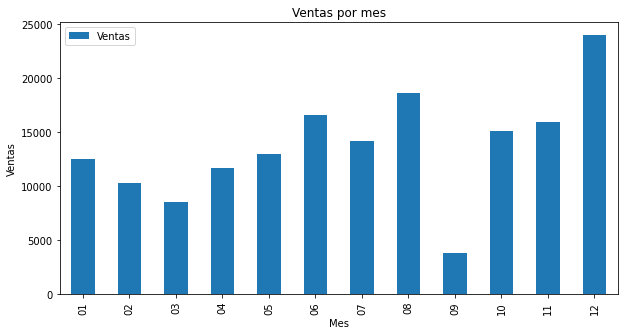

In [22]:
# graficar las ventas por mes
dfVentas.plot(kind='bar', figsize=(10,5))
plt.title('Ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()

## 5. ¿Cuál fue el mejor mes en ventas del año 2019? Explique

> El mes con mejores ventas fue el mes 12 correspondiente al mes de diciembre con un total de 24007 ventas

## 6. ¿Cuál fue el peor mes en ventas del año 2019? Explique

> El mes con peores ventas fue el mes 09 correspondiente al mes de septiembre con un total de 3846

## 7. Elabore una gráfica de "Ventas por Ciudad (año 2019)"

In [23]:
# df de ventas por ciudad
dfVentasCiudad = df2019.groupby('Ciudad(Departamento)').count()
dfVentasCiudad = dfVentasCiudad[['ID Orden']]
dfVentasCiudad.columns = ['Ventas']
dfVentasCiudad

,Ventas
Ciudad(Departamento),
Armenia QU,26298
Barranquilla AT,8840
Bogotá CU,17674
Bucaramanga SA,8618
Cali VC,13261
Cúcuta NS,21996
Ibagué TO,13030
Manizalez CA,13031
Medellin AN,39476


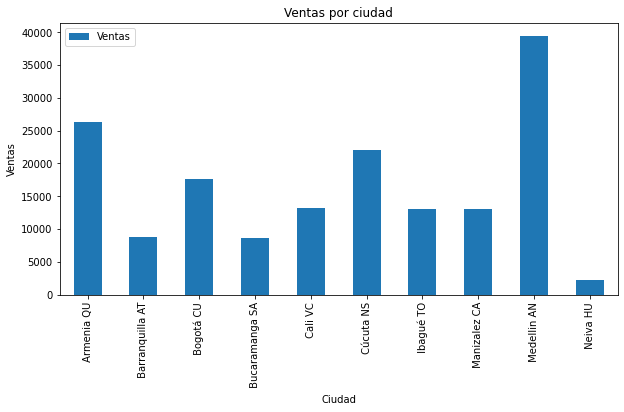

In [24]:
# graficar las ventas por ciudad
dfVentasCiudad.plot(kind='bar', figsize=(10,5))
plt.title('Ventas por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Ventas')
plt.show()

## 8. ¿Cuál fue la ciudad que más productos vendió? Explique

> La ciudad que mas productos vendio fue Medellin Antioquia con un total de 39476 durante todo el año

## 9. Elabore una gráfica de “Cantidad de Productos Vendidos (año 2019)”

In [25]:
# ver el nombre de los productos de la columna 'Producto'
df2019['Producto '].unique()

array(['Audifonos Apple Airpods', 'Parlante Google HomeMini',
       'Cable de Carga Lightning', 'Samsung Galaxy A302',
       'AAA Batteries (4-pack)', 'Multiolla Oster 0150 Negra PE',
       'Cable de Carga USB-C P/O', 'AA Batteries (4-pack)',
       'Horno Microondas 0.8P Samsung AGE',
       'Freidora Saludable B&D 3.5 Litros', 'Xiaomi REDMI Note 8',
       'Motorola G8 Plus Red', 'Audifonos Bose SoundSport',
       'Freidora Air Fryer Kalley K-MAF25',
       'Asus VivoBook X420FA-BV Laptop',
       'Macbook Air MQD32E/A 128GB 13.3"', 'LG Lavadora 19Kg Inv WT19',
       'LG Secadora Carga Frontal', 'Samsung Galaxy A20S'], dtype=object)

In [26]:
# df de los productos mas vendidos
dfProductos = df2019.groupby('Producto ').count()
dfProductos = dfProductos[['ID Orden']]
dfProductos.columns = ['Ventas']
dfProductos

,Ventas
Producto,
AA Batteries (4-pack),18248
AAA Batteries (4-pack),18203
Asus VivoBook X420FA-BV Laptop,3693
Audifonos Apple Airpods,13558
Audifonos Bose SoundSport,11735
Cable de Carga Lightning,18980
Cable de Carga USB-C P/O,19263
Freidora Air Fryer Kalley K-MAF25,6785
Freidora Saludable B&D 3.5 Litros,3673


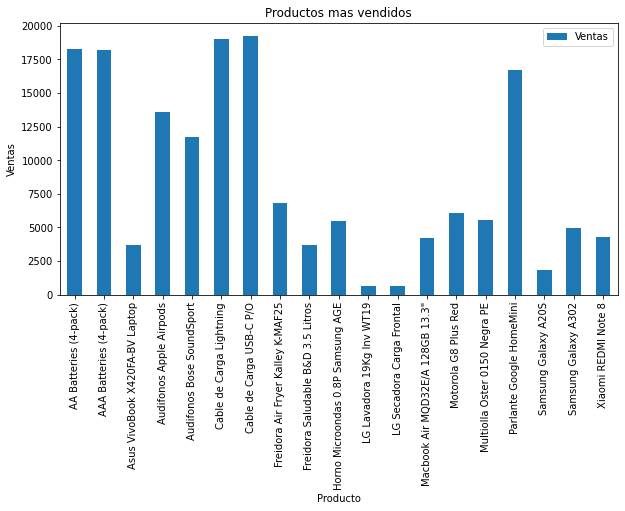

In [27]:
# graficar los productos mas vendidos
dfProductos.plot(kind='bar', figsize=(10,5))
plt.title('Productos mas vendidos')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.show()

## 10. ¿Cuál es el producto más vendido?

> El producto mas vendido es el Cable de Carga USB-C P/O con un total de 19263 ventas

## 11. ¿Por qué piensa que es el más vendido?

In [28]:
print(dfProductos.idxmax())
dfProductos.max()

Ventas    Cable de Carga USB-C P/O
dtype: object


Ventas    19263
dtype: int64

## 12. Dada las ventas por productos, elabore una gráfica sobre el punto anterior el precio promedio de los productos según el ejemplo

In [29]:
# pasar la columna precio a float
df2019['Precio Unitario '] = df2019['Precio Unitario '].astype(float)
df2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164404 entries, 0 to 24131
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID Orden              164404 non-null  object 
 1   Producto              164404 non-null  object 
 2    Cantidad Ordenada    164404 non-null  object 
 3   Precio Unitario       164404 non-null  float64
 4   Dia                   164404 non-null  object 
 5   Mes                   164404 non-null  object 
 6   Año                   164404 non-null  object 
 7   Hora                  164404 non-null  object 
 8   Direccion             164404 non-null  object 
 9   Ciudad(Departamento)  164404 non-null  object 
dtypes: float64(1), object(9)
memory usage: 13.8+ MB


In [30]:
# df con el precio promedio de los productos
dfPrecioPromedio = df2019.groupby('Producto ').mean()
dfPrecioPromedio = dfPrecioPromedio[['Precio Unitario ']]
dfPrecioPromedio.columns = ['Precio Promedio']
dfPrecioPromedio

,Precio Promedio
Producto,
AA Batteries (4-pack),13800.0
AAA Batteries (4-pack),12990.0
Asus VivoBook X420FA-BV Laptop,1950900.0
Audifonos Apple Airpods,499900.0
Audifonos Bose SoundSport,399900.0
Cable de Carga Lightning,64900.0
Cable de Carga USB-C P/O,46900.0
Freidora Air Fryer Kalley K-MAF25,198849.0
Freidora Saludable B&D 3.5 Litros,229900.0


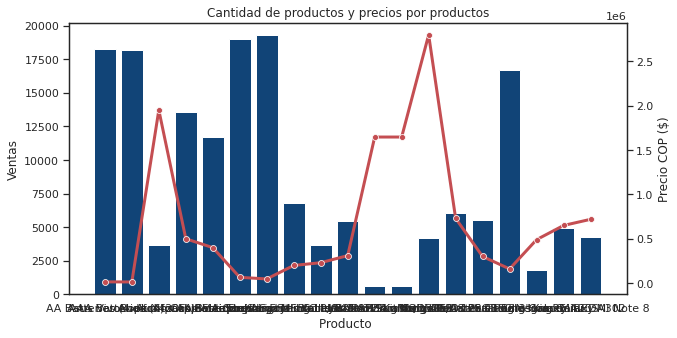

In [31]:
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
sns.barplot(x=dfProductos.index,
            y=dfProductos['Ventas'],
            color='#004488',
            ax=ax1)
sns.lineplot(x=dfPrecioPromedio.index,
                y=dfPrecioPromedio['Precio Promedio'],
                color='r',
                marker="o",
                ax=ax2)
plt.title('Cantidad de productos y precios por productos')
plt.xlabel('Producto')
plt.ylabel('Precio COP ($)')
plt.show()
sns.set()


## 13. Describa al menos 5 conclusiones sobre la gráfica del punto 12
- Los productos con menor precio son los de los que mas unidades hay vendidas
- Los productos menos vendidos son 'LG Lavadora 19Kg Inv WT19' y 'LG Secadora Carga Frontal' por lo que se le recomienda a la empresa elminarlos de su portafolio
- Los productos que menos se venden son los mas costosos 
- El producto mas vendido es el 'cable de Carga USB-C P/O' y su precio esta entre los mas bajos
- Las baterias 'AA' y 'AAA' se vendieron en una proporcion muy parecida y su precio de venta tambien es muy similar 

## 14. ¿Cuál es el promedio, desviación, el valor máximo y mínimo de las Ventas en el
dataset?

In [32]:
# promedio, desviacon estandar, minimo y maximo de las ventas
print('El promedio de ventas por mes es de: ',dfVentas.mean())
print('\nLa desviacion estandar de las ventas por mes es de: ',dfVentas.std())
print('\nEl minimo de ventas por mes es de: ',dfVentas.min())
print('\nEl maximo de ventas por mes es de: ',dfVentas.max())

El promedio de ventas por mes es de:  Ventas    13700.333333
dtype: float64

La desviacion estandar de las ventas por mes es de:  Ventas    5113.319067
dtype: float64

El minimo de ventas por mes es de:  Ventas    3846
dtype: int64

El maximo de ventas por mes es de:  Ventas    24007
dtype: int64


## 15. ¿Cuál es la proporción de ventas de la ciudad de Cúcuta en el año 2019?

In [33]:
# porcentaje de ventas en la ciudad de Cucuta
print('El porcentaje de ventas en la ciudad de Cucuta es de: ',(dfVentasCiudad.loc[' Cúcuta NS']/dfVentas.sum()*100))

El porcentaje de ventas en la ciudad de Cucuta es de:  Ventas    13.379237
dtype: float64


## 16. Calcule el promedio y la desviación estándar de las Ventas, en:

In [34]:
# nombres de las ciudads en VentasCiudad
dfVentasCiudad.index

Index([' Armenia QU', ' Barranquilla AT', ' Bogotá CU', ' Bucaramanga SA',
       ' Cali VC', ' Cúcuta NS', ' Ibagué TO', ' Manizalez CA', ' Medellin AN',
       ' Neiva HU'],
      dtype='object', name='Ciudad(Departamento)')

1. promedio y desviacion de ventas del mes abril en la ciudad de 'Armenia QU'

In [35]:
# crear un df con los datos de abril
df2019abril = df2019[df2019['Mes'] == '04']
df2019abril

,ID Orden,Producto,Cantidad Ordenada,Precio Unitario,Dia,Mes,Año,Hora,Direccion,Ciudad(Departamento)
120,163286,AA Batteries (4-pack),1,13800.0,01,04,19,01:06,629 calle Lincoln,Armenia QU
998,164128,Parlante Google HomeMini,1,159900.0,01,04,19,01:25,140 calle 2da,Cúcuta NS
1885,164983,Parlante Google HomeMini,1,159900.0,01,04,19,00:09,465 calle Jimenez,Cali VC
3869,166877,Asus VivoBook X420FA-BV Laptop,1,1950900.0,01,04,19,00:34,220 calle Bolivar,Manizalez CA
3871,166879,AA Batteries (4-pack),4,13800.0,01,04,19,01:08,490 calle Museo,Armenia QU
...,...,...,...,...,...,...,...,...,...,...
11749,182560,Parlante Google HomeMini,1,159900.0,01,04,19,17:25,369 calle Pinar,Cúcuta NS
11750,182561,Audifonos Apple Airpods,1,499900.0,15,04,19,15:26,774 calle Museo,Medellin AN
11751,182562,Samsung Galaxy A302,1,649900.0,09,04,19,09:42,762 calle Madison,Medellin AN
11752,182563,AA Batteries (4-pack),2,13800.0,28,04,19,17:57,735 calle Americas,Cali VC


In [36]:
dfAbrilArmenia = df2019abril[df2019abril['Ciudad(Departamento)'] == ' Armenia QU']

In [37]:
#sumar columna cantidad ordenada
dfAbrilArmenia[' Cantidad Ordenada'] = dfAbrilArmenia[' Cantidad Ordenada'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
dfAbrilArmenia[' Cantidad Ordenada'].describe()

count    1818.000000
mean        1.104510
std         0.392656
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name:  Cantidad Ordenada, dtype: float64

2. promedio y desviacion estandar de las ventas de los meses noviembre y diciembre en medellin

In [39]:
df2019novdic = df2019[(df2019['Mes'] == '11') | (df2019['Mes'] == '12')]
df2019novdic

,ID Orden,Producto,Cantidad Ordenada,Precio Unitario,Dia,Mes,Año,Hora,Direccion,Ciudad(Departamento)
378,246761,Horno Microondas 0.8P Samsung AGE,1,309900.0,01,11,19,00:35,964 calle Pte Aranda,Medellin AN
559,246933,AA Batteries (4-pack),1,13800.0,01,11,19,00:59,481 calle Jimenez,Medellin AN
1188,247537,AA Batteries (4-pack),1,13800.0,01,11,19,00:55,653 calle Adams,Medellin AN
1438,247779,Freidora Air Fryer Kalley K-MAF25,1,198849.0,01,11,19,00:33,658 calle Elm,Bogotá CU
1986,248308,AA Batteries (4-pack),1,13800.0,01,11,19,00:29,884 calle 14va,Armenia QU
...,...,...,...,...,...,...,...,...,...,...
24127,299477,Audifonos Bose SoundSport,1,399900.0,01,12,19,10:38,421 calle Autopista Norte,Armenia QU
24128,299478,Cable de Carga Lightning,1,64900.0,27,12,19,05:23,679 calle 4ta,Bucaramanga SA
24129,299479,Cable de Carga USB-C P/O,1,46900.0,15,12,19,12:41,707 calle Norte,Medellin AN
24130,299480,AAA Batteries (4-pack),1,12990.0,05,12,19,16:21,735 calle Carrera,Medellin AN


In [40]:
dfnovdicMedellin = df2019novdic[df2019novdic['Ciudad(Departamento)'] == ' Medellin AN']

In [41]:
#sumar columna cantidad ordenada
dfnovdicMedellin[' Cantidad Ordenada'] = dfnovdicMedellin[' Cantidad Ordenada'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
dfnovdicMedellin[' Cantidad Ordenada'].describe()

count    9629.000000
mean        1.101776
std         0.383804
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
Name:  Cantidad Ordenada, dtype: float64

3. Promedio y desviacion estandar de las ventas del mes de mayo en la ciudad de 'Bogota DC'


In [43]:
df2019mayo = df2019[df2019['Mes'] == '05']
df2019mayo

,ID Orden,Producto,Cantidad Ordenada,Precio Unitario,Dia,Mes,Año,Hora,Direccion,Ciudad(Departamento)
259,171590,"Macbook Air MQD32E/A 128GB 13.3""",1,2799000.0,01,05,19,00:19,534 calle Pte Aranda,Armenia QU
395,171723,Xiaomi REDMI Note 8,1,719000.0,01,05,19,00:08,413 calle Elm,Armenia QU
1270,172550,AA Batteries (4-pack),1,13800.0,01,05,19,00:14,255 calle 7ma,Manizalez CA
2660,173879,AA Batteries (4-pack),3,13800.0,01,05,19,03:58,349 calle 11ra,Armenia QU
2681,173899,Parlante Google HomeMini,1,159900.0,01,05,19,01:13,831 calle Kennedy,Medellin AN
...,...,...,...,...,...,...,...,...,...,...
13069,195093,Samsung Galaxy A302,1,649900.0,14,05,19,11:11,531 calle Cherry,Armenia QU
13070,195094,Audifonos Apple Airpods,1,499900.0,02,05,19,20:54,610 calle Sunset,Cúcuta NS
13071,195095,Cable de Carga USB-C P/O,1,46900.0,21,05,19,21:22,281 calle Cedar,Medellin AN
13072,195096,Motorola G8 Plus Red,1,729900.0,31,05,19,17:34,444 calle 7ma,Manizalez CA


In [44]:
dfmayoBogota = df2019mayo[df2019mayo['Ciudad(Departamento)'] == ' Bogotá CU']

In [45]:
#sumar columna cantidad ordenada
dfmayoBogota[' Cantidad Ordenada'] = dfmayoBogota[' Cantidad Ordenada'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
dfmayoBogota[' Cantidad Ordenada'].describe()

count    1415.000000
mean        1.086926
std         0.357094
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name:  Cantidad Ordenada, dtype: float64